# Importing data

In [1]:
import pandas as pd
true = pd.read_csv('../raw_data/True.csv')
fake = pd.read_csv('../raw_data/Fake.csv')

# Dropping some columns 

In [2]:
true.drop(columns = ['date', 'subject'], inplace = True)
fake.drop(columns = ['date', 'subject'], inplace = True)

# Creating target

In [3]:
true['score'] = 1
fake['score'] = 0

# Creating the complete dataset

In [4]:
data = pd.concat([true, fake], ignore_index=True)

# Brief Data Cleaning

In [5]:
stop_words = ['/Getty Images']
pat = '|'.join(r"\b{}\b".format(x) for x in stop_words)
data['text'] = data['text'].str.replace(pat, '')
data['text'].head()

0    WASHINGTON (Reuters) - The head of a conservat...
1    WASHINGTON (Reuters) - Transgender people will...
2    WASHINGTON (Reuters) - The special counsel inv...
3    WASHINGTON (Reuters) - Trump campaign adviser ...
4    SEATTLE/WASHINGTON (Reuters) - President Donal...
Name: text, dtype: object

# Creating a new dataset to work on/add features to

In [6]:
data_copy = data.copy()

# Adding features

In [7]:
import string

count = lambda l1,l2: sum([1 for x in l1 if x in l2])

data_copy['title_punc'] = data_copy.title.apply(lambda s: count(s, string.punctuation))

data_copy['text_punc'] = data_copy.text.apply(lambda s: count(s, string.punctuation))

data_copy.tail()

,title,text,score,title_punc,text_punc
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0,1,47
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0,7,44
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0,1,534
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0,2,70
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,0,2,149


In [8]:
data_copy['title_Upper'] = data_copy['title'].str.count(r'[A-Z]')

data_copy['text_Upper'] = data_copy['text'].str.count(r'[A-Z]')

data_copy.tail()

,title,text,score,title_punc,text_punc,title_Upper,text_Upper
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0,1,47,13,152
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0,7,44,15,69
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0,1,534,12,962
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0,2,70,9,170
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,0,2,149,11,281


In [9]:
data_copy.text[2]

'WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigation without political interference. “This investigation will go forward. It will be an investigation conducted without political influence,” Graham said on CBS’s Face the Nation news program. “And we all need to let Mr. Mueller do his job. I think he’s the right guy at the right time.”  The question of how Russia may have interfered in the election, and how Trump’s campaign may have had links with or co-ordinated any such effort, has loomed over the White House since Trump took office in January. It

In [10]:
data_copy['title'][44897]

'10 U.S. Navy Sailors Held by Iranian Military – Signs of a Neocon Political Stunt'

In [11]:
def count_digits(string):
    return sum(item.isdigit() for item in string)

data_copy['title_num'] = data_copy['title'].apply(count_digits)

data_copy['text_num'] = data_copy['text'].apply(count_digits)

data_copy.tail()

,title,text,score,title_punc,text_punc,title_Upper,text_Upper,title_num,text_num
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0,1,47,13,152,0,16
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0,7,44,15,69,2,10
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0,1,534,12,962,0,97
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0,2,70,9,170,3,49
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,0,2,149,11,281,2,25


**Changing the order of columns**

In [12]:
data_copy = data_copy[['title', 'text','title_punc', 'text_punc', 'title_Upper','text_Upper', 'title_num', 'text_num','score']]

In [13]:
data_copy.tail()

,title,text,title_punc,text_punc,title_Upper,text_Upper,title_num,text_num,score
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,1,47,13,152,0,16,0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,7,44,15,69,2,10,0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,1,534,12,962,0,97,0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,2,70,9,170,3,49,0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,2,149,11,281,2,25,0


# Data preparation for the model

## Checking distribution for outliers to understand better what kind of scaler we need to use

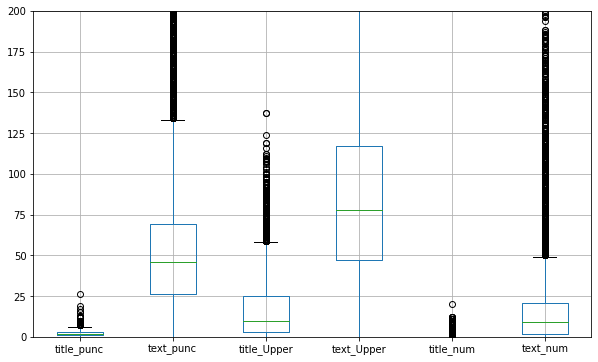

In [14]:
import matplotlib.pyplot as plt

boxplot = data_copy.boxplot(column=['title_punc', 'text_punc', 'title_Upper','text_Upper', 'title_num', 'text_num'], figsize=(10,6))

plt.ylim(0, 200)

plt.show()

**we need to use robustscaler there's lot of outliers**

## Preparing a pipeline with custom transformers

In [15]:
x = data_copy.drop(columns='score')
y = data_copy['score']

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

preprocessor = ColumnTransformer([
    ('vectorizer_title', CountVectorizer(), 'title'),
    ('vectorizer_text', CountVectorizer(), 'text'),
    ('MinMaxScaler', MinMaxScaler(), ['title_punc', 'text_punc', 'title_Upper', 'text_Upper','title_num', 'text_num'])
])

final_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('nb', MultinomialNB())])

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [18]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'preprocessing__vectorizer_title__ngram_range': ((1,1),(2,2),(3,3)),
    'preprocessing__vectorizer_text__ngram_range': ((1,1),(2,2),(3,3)),
    'nb__alpha': (0.1,1,2,5,10)}

grid_search = GridSearchCV(final_pipe,
                           parameters,
                           scoring = ["f1", "accuracy", "recall"],
                           refit= "accuracy",
                           cv=3,
                           verbose = 1)

In [19]:
final_pipe.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
            transformer_weights=None,
            transformers=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
           lowercase=True, max_df=1.0, max_features=None, min_df=1,
           ngram_range=(1, 1), preprocessor=None, stop_words=None,
   ...h_scaling=True), ['title_punc', 'text_punc', 'title_Upper', 'text_Upper', 'title_num', 'text_num'])])),
  ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
 'preprocessing': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
          transformer_weights=None,
          transformers=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1

In [19]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
tuned_pipe = random_search.best_estimator_

In [ ]:
import pickle

# Export pipeline as pickle file
with open("pipeline.pkl", "wb") as file:
    pickle.dump(tuned_pipe, file )